In [1]:
import pandas as pd
#setting configs plot size 5x4 inches and seaborn style whitegrid
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,4
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn import preprocessing


In [2]:
data=pd.read_csv('mammographic_masses.data.txt')

In [3]:
data.head(2)

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1


In [4]:
data=pd.read_csv('mammographic_masses.data.txt',na_values=['?'],names=['bi_rads','age','shape','margin','density','severnity'])

In [5]:
data.head(2)

,bi_rads,age,shape,margin,density,severnity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
bi_rads      959 non-null float64
age          956 non-null float64
shape        930 non-null float64
margin       913 non-null float64
density      885 non-null float64
severnity    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [7]:
data.describe()

,bi_rads,age,shape,margin,density,severnity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [8]:
# data.dropna(inplace=True)  #dropping nan vslue data

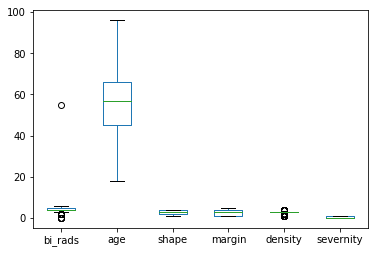

In [9]:
data.plot(kind='box')

In [10]:
data.sort_values("bi_rads", axis=0, ascending=False, inplace=False,na_position='last').tail(8)  #bi_rads should be 1-5 (0 and more than 5 is wrong)
# 2 value - na
# 5 value - 0
# 1 value - >5

,bi_rads,age,shape,margin,density,severnity
658,2.0,40.0,1.0,1.0,3.0,0
950,0.0,71.0,4.0,4.0,3.0,1
799,0.0,72.0,4.0,3.0,3.0,1
893,0.0,45.0,2.0,4.0,3.0,0
456,0.0,69.0,4.0,5.0,3.0,1
533,0.0,58.0,4.0,4.0,3.0,0
20,NaN,66.0,NaN,NaN,1.0,1
208,NaN,52.0,4.0,4.0,3.0,0


In [11]:
data.isnull().sum()

bi_rads       2
age           5
shape        31
margin       48
density      76
severnity     0
dtype: int64

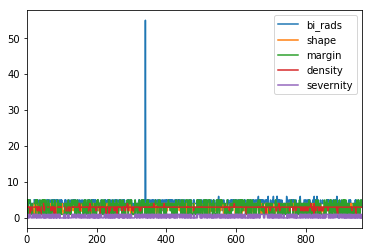

In [12]:
# data.bi_rads.plot(kind='bar')
data.loc[:,['bi_rads','shape','margin','density','severnity']].plot()

In [13]:
import numpy as np
data.loc[data.bi_rads>50,'bi_rads']=np.nan

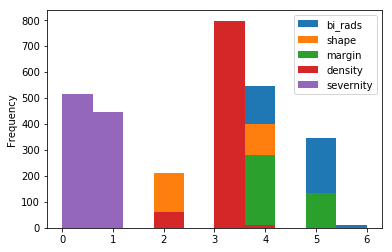

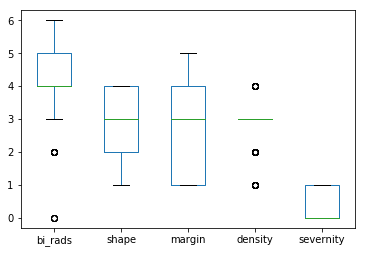

In [14]:
data.loc[:,['bi_rads','shape','margin','density','severnity']].plot(kind='hist')  #without age becuase of value difference
data.loc[:,['bi_rads','shape','margin','density','severnity']].plot(kind='box')  

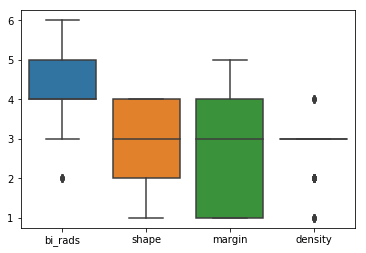

In [15]:
# now remove bi_rads=0
data.loc[data.bi_rads==0,'bi_rads']=np.nan
sb.boxplot(data=data.loc[:,['bi_rads','shape','margin','density']])

In [16]:
data.describe()

,bi_rads,age,shape,margin,density,severnity
count,953.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.317943,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.635656,14.480131,1.242792,1.566546,0.380444,0.498893
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


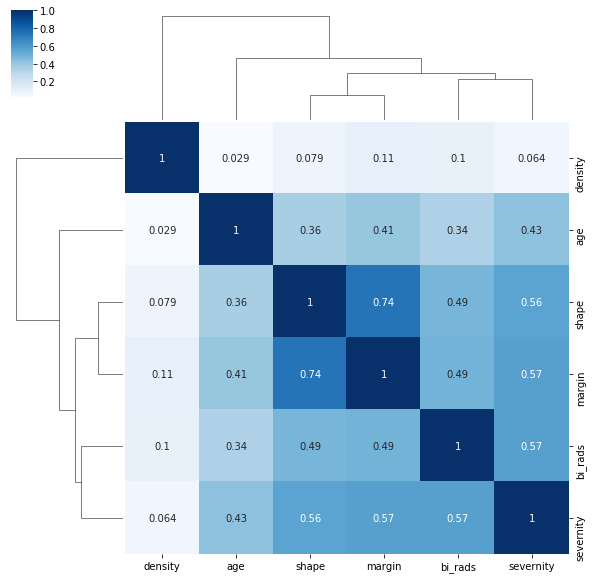

In [18]:
sb.clustermap(data.corr(),cmap='Blues',annot=True)

#### margin and shape have great correlation

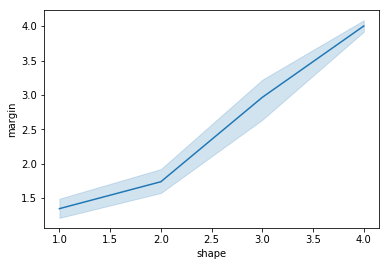

In [19]:
# sb.relplot(y="shape",x="margin",data=data)
# sb.scatterplot(y="shape",x="margin",data=data)
sb.lineplot(x="shape",y="margin",data=data)
# sb.jointplot(y="margin", x="shape", kind="hex", color="#4CB391")

In [20]:
data.isnull().sum()

bi_rads       8
age           5
shape        31
margin       48
density      76
severnity     0
dtype: int64

In [21]:
data.sort_values("bi_rads", axis=0, ascending=True, inplace=False,na_position='first').head(10)

,bi_rads,age,shape,margin,density,severnity
20,NaN,66.0,NaN,NaN,1.0,1
208,NaN,52.0,4.0,4.0,3.0,0
340,NaN,46.0,4.0,3.0,3.0,1
456,NaN,69.0,4.0,5.0,3.0,1
533,NaN,58.0,4.0,4.0,3.0,0
799,NaN,72.0,4.0,3.0,3.0,1
893,NaN,45.0,2.0,4.0,3.0,0
950,NaN,71.0,4.0,4.0,3.0,1
48,2.0,42.0,NaN,NaN,4.0,0
868,2.0,23.0,1.0,1.0,3.0,0


In [22]:
# data.interpolate(method ='linear', limit_direction ='forward',inplace=True)
data.dropna(inplace=True)

In [23]:
# data.sort_values("bi_rads", axis=0, ascending=True, inplace=False,na_position='first').head(10)
data.isnull().sum()

bi_rads      0
age          0
shape        0
margin       0
density      0
severnity    0
dtype: int64

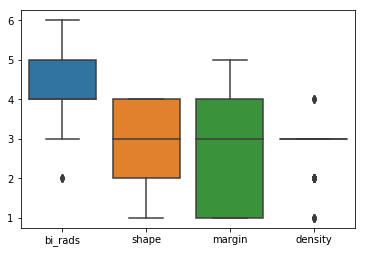

In [134]:
sb.boxplot(data=data.loc[:,['bi_rads','shape','margin','density']])

In [47]:
data.describe()

,bi_rads,age,shape,margin,density,severnity
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,4.359223,55.750000,2.775485,2.805825,2.915049,0.484223
std,0.601406,14.688524,1.242946,1.569350,0.352139,0.500055
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.750000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [26]:
# pd.options.display.float_format = '{:,.0f}'.format


In [27]:
data.describe()

,bi_rads,age,shape,margin,density,severnity
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,4.359223,55.750000,2.775485,2.805825,2.915049,0.484223
std,0.601406,14.688524,1.242946,1.569350,0.352139,0.500055
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.750000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 960
Data columns (total 6 columns):
bi_rads      824 non-null float64
age          824 non-null float64
shape        824 non-null float64
margin       824 non-null float64
density      824 non-null float64
severnity    824 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


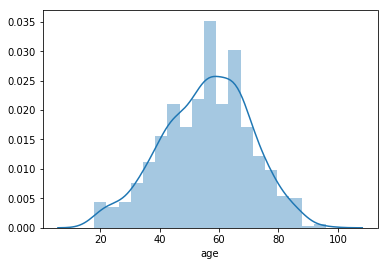

In [96]:
sb.distplot(data.age) 
# sb.distplot(data.shape) 

# -------------------------------------------------------------------------------------------------------------

In [97]:
data.head()

,bi_rads,age,shape,margin,density,severnity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [104]:
y=data.severnity
X = data.loc[:,['bi_rads','shape','margin','density']]

In [105]:
X.head()

,bi_rads,shape,margin,density
0,5.0,3.0,5.0,3.0
2,5.0,4.0,5.0,3.0
3,4.0,1.0,1.0,3.0
8,5.0,1.0,5.0,3.0
10,5.0,1.0,4.0,3.0


In [106]:
scaler = preprocessing.StandardScaler()
print(scaler.fit(X,y=data.age))

# scaled_df = pd.DataFrame(scaled_df, columns=['bi_rads', 'age', 'shape','margin','density','severnity'])


StandardScaler(copy=True, with_mean=True, with_std=True)


In [107]:
print(scaler.transform(X))


[[ 1.06611205  0.1807407   1.39899199  0.24139079]
 [ 1.06611205  0.98576953  1.39899199  0.24139079]
 [-0.59766888 -1.42931697 -1.15138278  0.24139079]
 ...
 [-0.59766888  0.98576953  1.39899199  0.24139079]
 [ 1.06611205  0.98576953  1.39899199  0.24139079]
 [-0.59766888  0.1807407   0.1238046   0.24139079]]


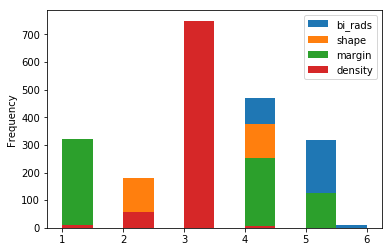

In [139]:
data.loc[:,['bi_rads','shape','margin','density']].plot(kind='hist')

In [109]:
X.tail()

,bi_rads,shape,margin,density
956,4.0,2.0,1.0,3.0
957,4.0,4.0,5.0,3.0
958,4.0,4.0,5.0,3.0
959,5.0,4.0,5.0,3.0
960,4.0,3.0,3.0,3.0


In [110]:
X.shape

(824, 4)

In [111]:
y.tail()

956    0
957    1
958    0
959    1
960    0
Name: severnity, dtype: int64

In [112]:
y.shape

(824,)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=10)

### Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

In [114]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=1,
                                    max_features=1,
                                    n_estimators = 9,
                                    random_state = 13,
    criterion='gini',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
#     max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    verbose=0,
    warm_start=False,
    class_weight=None)
#-------------------------------------------------------------------------------------------------------
classifier.fit(X_train, Y_train)
# ---------------------------------------------------------------------------------------------------------------------
Y_pred = classifier.predict(X_test)
# ----------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score, classification_report
print("                  Accuracy score=",accuracy_score(Y_test, Y_pred)*100,"%") #most accurate
# ------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix #confusuon matrix for randomforest
pd.crosstab(Y_test, Y_pred)

                  Accuracy score= 80.24193548387096 %


col_0,0,1
severnity,,
0,100,33
1,16,99


### benign=0 or malignant=1(danger)
#### focus on down left(false positve)

## other algorithm---------------------------------------------------------------------------------------------------------------

In [125]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)
# Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 1)
classifier4.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)



C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [126]:
Y_pred1 = classifier1.predict(X_test)
Y_pred2 = classifier2.predict(X_test)
Y_pred3 = classifier3.predict(X_test)
Y_pred4 = classifier4.predict(X_test)
Y_pred5= classifier5.predict(X_test)
Y_pred6 = classifier6.predict(X_test)


In [127]:
print(accuracy_score(Y_test, Y_pred1))
print(accuracy_score(Y_test, Y_pred2))
print(accuracy_score(Y_test, Y_pred3))
print(accuracy_score(Y_test, Y_pred4))
print(accuracy_score(Y_test, Y_pred5))
print(accuracy_score(Y_test, Y_pred6))

0.842741935483871
0.8548387096774194
0.8508064516129032
0.8629032258064516
0.8225806451612904
0.8306451612903226


In [129]:
pd.crosstab(Y_test, Y_pred1)

col_0,0,1
severnity,,
0,108,25
1,14,101


In [130]:
pd.crosstab(Y_test, Y_pred2)

col_0,0,1
severnity,,
0,110,23
1,13,102


In [131]:
pd.crosstab(Y_test, Y_pred3)

col_0,0,1
severnity,,
0,122,11
1,26,89


In [132]:
pd.crosstab(Y_test, Y_pred4)

col_0,0,1
severnity,,
0,109,24
1,10,105


In [133]:
pd.crosstab(Y_test, Y_pred5)

col_0,0,1
severnity,,
0,106,27
1,17,98


## Best accuracy so far with less false negative value
##### =86%  svc

In [140]:
print(accuracy_score(Y_test, Y_pred4)) #most accurate

0.8629032258064516


## Though in medical science field this accuracy is not accepted but it can really ease doctors to predict 